In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import re
from google.colab import files
import seaborn as sns

In [2]:
# Allow file upload
uploaded = files.upload()

Saving Alpha synuclein Log transformed.xlsx to Alpha synuclein Log transformed.xlsx


In [3]:
# STEP 3: Load data
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, sheet_name='Sheet1')

In [4]:
df


,Gene ID,WT_D1_1,WT_D1_2,WT_D10_1,WT_D10_2,WT_D30_1,WT_D30_2,A30P_D1_1,A30P_D1_2,A30P_D10_1,A30P_D10_2,A53T_D1_1,A53T_D1_2,A53T_D10_1,A53T_D10_2,A53T_D30_1,A53T_D30_2
0,NaN,-1.144903,NaN,NaN,NaN,-0.646406,-1.390510,-0.630707,-1.048800,-1.363457,-1.449612,-0.991943,NaN,-1.464066,-1.939095,NaN,-2.285038
1,dnc,-1.258322,-1.648779,-1.381122,-2.117787,-2.122366,-2.448194,-1.834030,-2.350706,-1.820311,-2.124629,-1.187871,NaN,-2.388733,-2.078198,NaN,-2.181804
2,NaN,NaN,NaN,-0.444125,-1.867121,NaN,-0.189960,-1.984845,NaN,-2.193833,-1.280685,-1.456999,NaN,-2.380521,-2.714633,-2.430820,-2.072483
3,Marf,-0.954641,-1.284686,-1.517296,-2.158816,-0.537613,-0.992833,-1.037977,-1.583549,-1.725899,-2.042992,-0.804048,-1.256528,-1.649095,-1.301017,NaN,-1.980796
4,Rh4,NaN,-0.369930,NaN,NaN,NaN,-3.020692,0.648926,-1.958981,-3.534981,0.174406,NaN,NaN,-0.967448,-1.357825,-0.627471,-1.930765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,Cyp6a23,NaN,1.243730,0.537843,0.771548,0.571143,0.717912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.640482,1.726395
4428,Mi-2,-1.502260,-2.145797,-0.977043,-0.582555,-1.687056,-0.233006,-1.819801,-0.991771,-1.260186,NaN,-1.258563,-2.052715,NaN,NaN,0.459851,-0.911750
4429,Usp7,-1.677010,-2.070542,-1.961789,-1.953383,-2.385187,-1.118038,-2.645119,-1.308859,-2.134477,-1.697968,-1.877261,-0.962238,-1.931536,-1.724611,0.093154,-1.275332
4430,Aats-his,-1.323805,-1.671393,-0.775441,-0.949227,-1.156724,-1.075398,-1.364348,-1.976305,-1.202970,-1.173840,-1.890145,-2.204898,-1.420472,-1.337630,2.648834,-1.484954


In [17]:
# Clean up column names by stripping whitespace
df.columns = df.columns.str.strip()
# Calculate mean for WT, A30P, and A53T replicates
df['WT_Mean'] = df[['WT_D1_1', 'WT_D1_2', 'WT_D10_1', 'WT_D10_2', 'WT_D30_1', 'WT_D30_2']].mean(axis=1)
df['A30P_Mean'] = df[['A30P_D1_1', 'A30P_D1_2', 'A30P_D10_1', 'A30P_D10_2',]].mean(axis=1)
df['A53T_Mean'] = df[['A53T_D1_1', 'A53T_D1_2', 'A53T_D10_1', 'A53T_D10_2', 'A53T_D30_1', 'A53T_D30_2']].mean(axis=1)

In [18]:
# Calculate log2 fold-change for A30P vs WT (data is already log-transformed, so subtract means)
df['A30P_Log2_FC'] = df['A30P_Mean'] - df['WT_Mean']

# Calculate log2 fold-change for A53T vs WT (data is already log-transformed, so subtract means)
df['A53T_Log2_FC'] = df['A53T_Mean'] - df['WT_Mean']

df['A30P_Abs_Log2_FC'] = df['A30P_Log2_FC'].fillna(0).abs()
df['A53T_Abs_Log2_FC'] = df['A53T_Log2_FC'].fillna(0).abs()
print("Mean columns and absolute log2 fold change columns created.")

Mean columns and absolute log2 fold change columns created.


In [24]:
top_10_genes_A30P = df.sort_values(by='A30P_Abs_Log2_FC', ascending=False)['Gene ID'].head(10).tolist()
top_10_genes_A53T = df.sort_values(by='A53T_Abs_Log2_FC', ascending=False)['Gene ID'].head(10).tolist()

# Combine and get unique gene IDs, excluding NaN
combined_top_genes = pd.Series(top_10_genes_A30P + top_10_genes_A53T).dropna().unique().tolist()
print("Top 10 gene IDs for A30P vs WT:", top_10_genes_A30P)
print("Top 10 gene IDs for A53T vs WT:", top_10_genes_A53T)
print("Combined unique top gene IDs:", combined_top_genes)

Top 10 gene IDs for A30P vs WT: ['mRpS18C', nan, 'fs(1)h', 'Cyp6a20', 'slik', 'Ppcs', 'CG3209-RA', 'Mms19', 'BcDNA.LD34475', 'CG9977-RA']
Top 10 gene IDs for A53T vs WT: [nan, 'lid', 'Ranbp9', 'fs(1)h', 'Syx7', 'Cbp80', nan, 'garz', 'Cyp6a20', 'Ubp64E']
Combined unique top gene IDs: ['mRpS18C', 'fs(1)h', 'Cyp6a20', 'slik', 'Ppcs', 'CG3209-RA', 'Mms19', 'BcDNA.LD34475', 'CG9977-RA', 'lid', 'Ranbp9', 'Syx7', 'Cbp80', 'garz', 'Ubp64E']


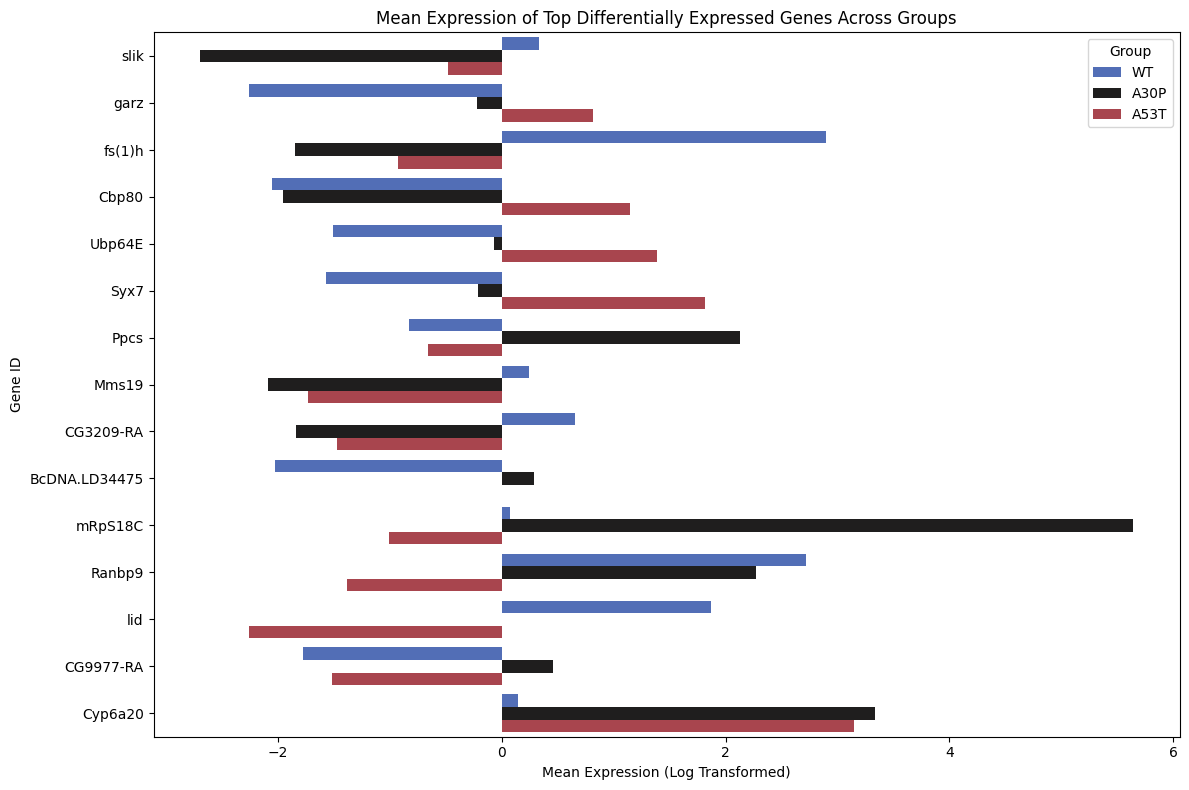

Grouped bar plot displayed.


In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Expression', y='Gene ID', hue='Group', data=df_melted, palette='icefire')
plt.title('Mean Expression of Top Differentially Expressed Genes Across Groups')
plt.xlabel('Mean Expression (Log Transformed)')
plt.ylabel('Gene ID')
plt.legend(title='Group')
plt.tight_layout()
plt.show()
print("Grouped bar plot displayed.")
